# Chapter 1: Arrays and Strings

In [246]:
import matplotlib.pyplot as plt
import numpy as np
import time
import string

N = 100000

def time_and_check(funcs, cases, exp):
    # check for correctness
    for i, s in enumerate(cases):
        print("on case: ", i)
        e = exp[i]
        assert np.all([ f(s) == e for f in funcs])

    # time functions
    for i, f in enumerate(funcs):
        start = time.time()
        for _ in range(N):
            for s in cases:
                f(s)

        end = time.time()
        t = end - start
        print(i, "{0:.5f} seconds".format(t))

#### 1.1 Implement an algorithm to determine if a string has all unique characters. What if you can not use additional data structures?

Notes: 

Python's <em>sorted</em> function uses an algo called (https://en.wikipedia.org/wiki/Timsort)[timsort]. It's derived from <em>merge sort</em> and <em>insertion sort</em>. In the worst case it's $O(nlog(n))$ and in the best case it takes linear time. 

In [86]:
%time 

def all_unique_a(s):
    return len(set(s)) == len(s)

def all_unique_b(s):  
    seen = set() # checking membership in a hashtable in O(1) average case and O(n) in the worst
    for l in s:
        if l in seen:
            return False
        seen.add(l)
    return True

def all_unique_c(s):
    ss = sorted(s) # have to do a full pass over the string – O(n log n) for worst case
    prev = None
    for l in ss:
        if l == prev:
            return False
        prev = l
    return True

    
funcs = [all_unique_a, all_unique_b, all_unique_c]
cases = ["abc", "aabc", string.ascii_letters, string.ascii_letters[::-1], string.ascii_letters[::-1] + "a"]
exp = [True, False, True, True, False]

time_and_check(funcs, cases, exp)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs
0 0.45564 seconds
1 1.66571 seconds
2 1.24158 seconds
3 0.45826 seconds


#### 1.3 Design an algorithm and write code to remove the duplicate characters in a string without using any additional buffer <br><br>NOTE: One or two additional variables are fine but an extra copy of the array is not

In [98]:
def remove_dupes_a(s):
    if len(s) == 0:
        return s
    
    res = ""
    for i in range(len(s)):
        l = s[i]
        if l not in res[:i]:
            res += l
    return res

def remove_dupes_b(s):
    import math
    ln = len(s)
    if ln == 0 or ln == 1:
        return s
    for x in s:
    sp = math.floor(ln/2)
    return remove_dupes_b(s[:sp]) + remove_dupes_b(s[sp:])

funcs = [remove_dupes_a, remove_dupes_b]
cases = [string.ascii_letters, string.ascii_letters + "a"]
exp = [string.ascii_letters, string.ascii_letters]

remove_dupes_b(string.ascii_letters + "a")
# time_and_check(funcs, cases, exp)

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZa'

#### 1.4 Write a method to decide if two strings are anagrams or not

Follow up questions:<br>
Can I repeat letters?<br>
Do we count space as a character? 

In [108]:
def is_anagram_a(s1, s2):
    assert s1 != None and s2 != None
    s1 = s1.replace(' ', ''); s2 = s2.replace(' ', '')
    ss1 = set(s1); ss2 = set(s2)
    return len(ss1 & ss2) == len(ss1) and len(s1) == len(s2)

# anagrams
print(is_anagram_a("naga ram", "anagram"))
print(is_anagram_a("binary", "brainy"))

# non-anagrams
print(is_anagram_a("but", "butt"))
print(is_anagram_a("lie", "tie"))

True
True
False
False


#### 1.5 Write a method to replace all spaces in a string with ‘%20’


In [109]:
def url_encode(s):
    return s.replace(' ', '%20')
url_encode("www.mywebsite.com/the coolest page ever")

'www.mywebsite.com/the%20coolest%20page%20ever'

#### 1.6 Given an image represented by an NxN matrix, where each pixel in the image is 4 bytes, write a method to rotate the image by 90 degrees. Can you do this in place?

Clockwise or counter-clockwise?

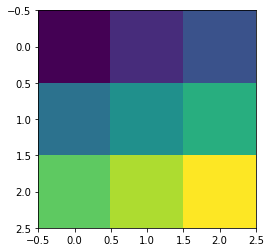

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[7 4 1]
 [8 5 2]
 [9 6 3]]


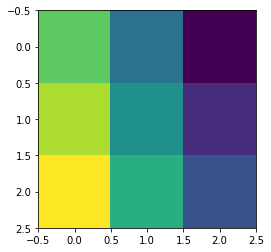

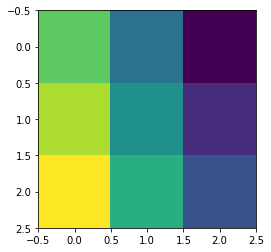

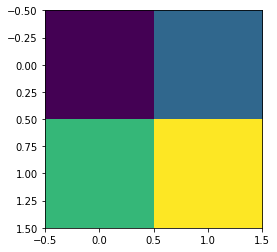

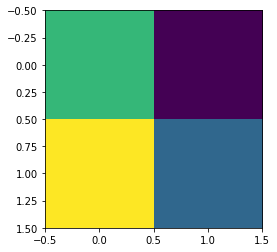

In [288]:
import matplotlib.pyplot as plt
import numpy as np
import struct

# counter clockwise
def rotate_90_a(img):
    assert len(img) != 0 and len(img) == len(img[0])
    arr = np.array(img)
    res = arr.copy()
    N = arr.shape[0] 
    res = []
    print(arr)
    print()
    for i in range(N)[::-1]:
        row = []
        for j in range(N):
            row.append(arr[j][i])
        res.append(row[::-1])
    print(np.reshape(res[::-1], (N, N)))
    return res[::-1]
    
def rotate_90_b(img):
    assert img != None and len(img) == len(img[0])
    N = len(img)
    rot = np.identity(N)[::-1]
    return np.array(img).T.dot(rot)
       
# original image
img = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
plt.imshow(img); plt.show();

# rotated image
plt.imshow(rotate_90_a(img)); plt.show();
plt.imshow(rotate_90_b(img)); plt.show();

plt.imshow([[1, 2], [3, 4]]); plt.show();
plt.imshow(rotate_90_b([[1, 2], [3, 4]]));

#### 1.7 Write an algorithm such that if an element in an MxN matrix is 0, its entire row and column is set to 0

In [289]:
def to_zero_a(m):
    assert len(m) != 0 and type(m) == list
    rows = len(m)
    cols = len(m[0])
    
    x = []
    rows_idx = []
    cols_idx = []
    
    
    for i in range(rows):
        row = [0]*cols
        
        for j in range(cols):
            if m[i][j] == 0:
                cols_idx.append(j)
                rows_idx.append(i)
            if not i in rows_idx and not j in cols_idx:
                row[j] = m[i][j]            
        x.append(row)
    return x


funcs = [ to_zero_a ]
cases = [
    [[1, 2, 3], [1, 2, 3]],
    [[0, 2, 3], [1, 2, 3]],
    [[1, 2, 3], [4, 0, 5], [6, 7, 8]]
]
exp = [
    [[1, 2, 3], [1, 2, 3]],
    [[0, 0, 0], [0, 2, 3]],
    [[1, 0, 3], [0, 0, 0], [6, 0, 8]] 
]

# time_and_check(funcs, cases, exp)

#### 1.8 Assume you have a method isSubstring which checks if one word is a substring of another Given two strings, s1 and s2, write code to check if s2 is a rotation of s1 using only one call to isSubstring (i e , “waterbottle” is a rotation of “erbottlewat”)